In [ ]:
# Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. 
# Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, 
# так как при работе с исходным изображением вы получите некорректный результат.

# Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

# Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, 
# отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

# Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно.

# Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, 
# но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

In [101]:
import pandas as pd
from skimage import io, util
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import peak_signal_noise_ratio as psnr

image = io.imread('parrots.jpg')
float_image = util.img_as_float(image)
height, width, channels = float_image.shape
flattened_image = float_image.reshape(-1, channels)
df = pd.DataFrame(flattened_image, columns=['R', 'G', 'B'])

for i in range(8, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=241)
    kmeans.fit(df)
    labels = kmeans.labels_
    # centers = kmeans.cluster_centers_

    labels_df = pd.DataFrame(labels, columns=['label'])
    df_labeled = pd.concat([df, labels_df], axis=1)

    df_gb = df_labeled.groupby('label').agg(['mean', 'median'])
    df_gb.columns = ['_'.join(col).strip() for col in df_gb.columns.values]
    df_gb = df_gb.rename(columns={'label_': 'label'})
    df_gb = df_gb[['R_mean','G_mean', 'B_mean', 'R_median', 'G_median', 'B_median']]
    df_gb_mean = df_gb[['R_mean','G_mean', 'B_mean']]
    df_gb_median = df_gb[['R_median', 'G_median', 'B_median']]

    df_labeled_v2 = df_labeled.set_index('label').join(df_gb).reset_index()
    compressed_colors_means = df_gb_mean.values
    compressed_colors_medians = df_gb_median.values
    reconstructed_image_means = compressed_colors_means[labels].reshape(height, width, channels)
    reconstructed_image_medians = compressed_colors_medians[labels].reshape(height, width, channels)
    psnr_value_means = psnr(float_image, reconstructed_image_means)
    psnr_value_medians = psnr(float_image, reconstructed_image_medians)
    print(f"i: {i}, PSNR_means: {psnr_value_means:.2f}, PSNR_medians: {psnr_value_medians:.2f}")
    if psnr_value_means > 20 and psnr_value_medians > 20:
        break

i: 8, PSNR_means: 18.38, PSNR_medians: 18.10
i: 9, PSNR_means: 19.14, PSNR_medians: 18.84
i: 10, PSNR_means: 19.54, PSNR_medians: 19.23
i: 11, PSNR_means: 20.08, PSNR_medians: 19.83
i: 12, PSNR_means: 20.58, PSNR_medians: 20.32


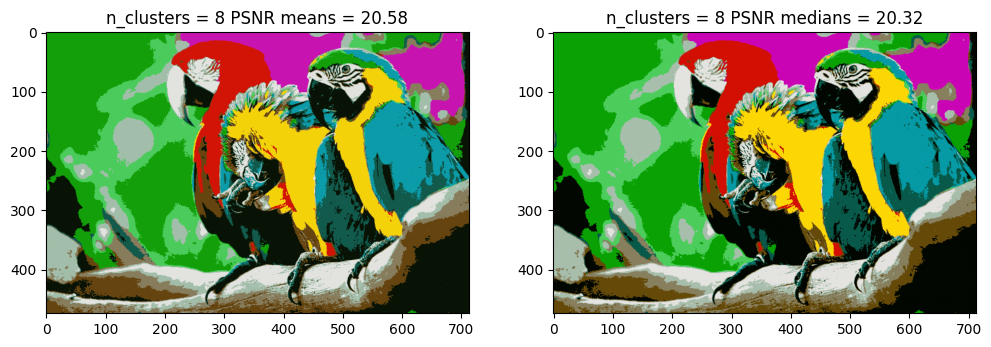

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(reconstructed_image_means)
ax[0].set_title(f"n_clusters = 8 PSNR means = {psnr_value_means:.2f}")
ax[1].imshow(reconstructed_image_medians)
ax[1].set_title(f"n_clusters = 8 PSNR medians = {psnr_value_medians:.2f}");